# Tutorial 2 (kraci)

In [10]:
import scDML
print(scDML.__version__)
import scanpy as sc 
import torch
from scDML import scDMLModel
from scDML.utils import print_dataset_information
import matplotlib.pyplot as plt
import os
import scib
os.system("clear")

###############
dataset="human_pancreas_norm_complexBatch"
ncluster=14
###############

data_dir="/home/ubuntu/benchmarking/"+dataset+".h5ad"
adata_raw=ad.read_h5ad(data_dir)
print(adata_raw)
adata_raw.raw=adata_raw
adata_raw.obs['BATCH'] = adata_raw.obs.tech
#adata_raw.obs['celltype'] = adata_raw.obs.assigned_cluster
print_dataset_information(adata_raw,batch_key="BATCH",celltype_key="celltype")

0.0.1
AnnData object with n_obs × n_vars = 16382 × 1000
    obs: 'tech', 'celltype', 'size_factors', 'BATCH', 'batch'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'
===========print brief infomation of dataset ===============
===========there are 9 batchs in this dataset==============
===========there are 14 celltypes with this dataset=========


celltype,acinar,activated_stellate,alpha,beta,delta,ductal,endothelial,epsilon,gamma,macrophage,mast,quiescent_stellate,schwann,t_cell,Total
BATCH,,,,,,,,,,,,,,,
celseq,228,19,191,161,50,327,5,1,18,1,1,1,1,0,1004
celseq2,274,90,843,445,203,258,21,4,110,15,6,12,4,0,2285
fluidigmc1,21,16,239,258,25,36,14,1,18,1,3,1,5,0,638
inDrop1,110,51,236,872,214,120,130,13,70,14,8,92,5,2,1937
inDrop2,3,81,676,371,125,301,23,2,86,17,9,22,6,2,1724
inDrop3,843,100,1130,787,161,376,92,2,36,14,7,54,1,2,3605
inDrop4,2,52,284,495,101,280,7,1,63,10,1,5,1,1,1303
smarter,0,0,886,472,49,0,0,0,85,0,0,0,0,0,1492
smartseq2,188,55,1008,308,127,444,21,8,213,7,7,6,2,0,2394


## Raw dataset visualization

Note: ovaj dataset je normalizovan!!!

[<Axes: title={'center': 'BATCH'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'celltype'}, xlabel='UMAP1', ylabel='UMAP2'>]

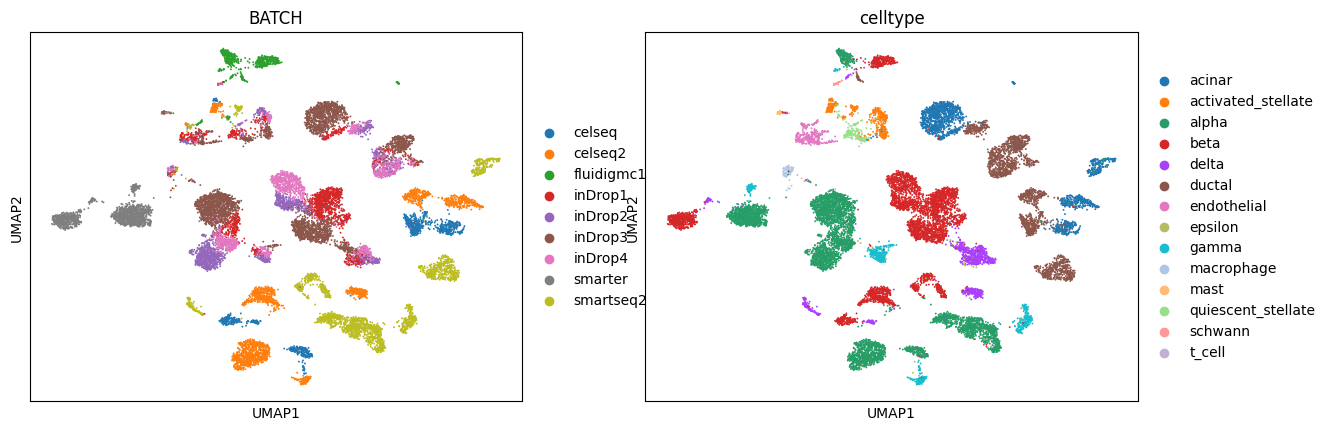

In [3]:
#View raw data,check the batch effect of this batch effect 
adata_copy=adata_raw.copy()
sc.pp.normalize_total(adata_copy,target_sum=1e4)
sc.pp.log1p(adata_copy)
sc.pp.highly_variable_genes(adata_copy,n_top_genes=2000,subset=True)
sc.pp.scale(adata_copy)
sc.tl.pca(adata_copy)
sc.pp.neighbors(adata_copy)
sc.tl.umap(adata_copy)
sc.pl.umap(adata_copy,color=["BATCH","celltype"],show=False)

## scDML integration

In [9]:
adata

AnnData object with n_obs × n_vars = 16382 × 1000
    obs: 'tech', 'celltype', 'size_factors', 'BATCH', 'batch', 'init_cluster', 'reassign_cluster'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'mean-3', 'std-3', 'mean-4', 'std-4', 'mean-5', 'std-5', 'mean-6', 'std-6', 'mean-7', 'std-7', 'mean-8', 'std-8'
    uns: 'pca', 'neighbors', 'umap', 'BATCH_colors', 'celltype_colors', 'reassign_cluster_colors'
    obsm: 'X_pca', 'X_emb', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

2023-08-30 19:16:15,864 - root - INFO - Create log file....
2023-08-30 19:16:15,869 - root - INFO - Create scDMLModel Object Done....
2023-08-30 19:16:15,873 - root - INFO - Running preprocess() function...
2023-08-30 19:16:15,874 - root - INFO - mode=unsupervised
2023-08-30 19:16:15,876 - root - INFO - clustering method=louvain
2023-08-30 19:16:15,878 - root - INFO - resolution=1.0
2023-08-30 19:16:15,878 - root - INFO - BATCH_key=BATCH
2023-08-30 19:16:15,879 - root - INFO - Normalize counts per cell(sum=10000.0)
2023-08-30 19:16:16,193 - root - INFO - Log1p data
2023-08-30 19:16:16,577 - root - INFO - Select HVG(n_top_genes=1000)
2023-08-30 19:16:20,136 - root - INFO - Scale batch(scale_value=10.0)
2023-08-30 19:16:22,116 - root - INFO - Calculate PCA(n_comps=100)


         Falling back to preprocessing with `sc.pp.pca` and default params.


2023-08-30 19:16:29,484 - root - INFO - Apply louvain clustring(resolution=1.0) initization
2023-08-30 19:16:29,487 - root - INFO - Number of Cluster =21
2023-08-30 19:16:29,489 - root - INFO - clusters=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
2023-08-30 19:16:29,491 - root - INFO - Preprocess Dataset Done...
2023-08-30 19:16:29,492 - root - INFO - mode=unsupervised
2023-08-30 19:16:29,533 - root - INFO - K_in=5,K_bw=10
2023-08-30 19:16:29,534 - root - INFO - Calculate similarity of cluster with KNN and MNN
2023-08-30 19:16:29,535 - root - INFO - appoximate calculate KNN Pair intra batch...
2023-08-30 19:16:29,544 - root - INFO - Calculate KNN pair intra batch...........
2023-08-30 19:16:29,545 - root - INFO - K=5
2023-08-30 19:16:29,546 - root - INFO - metric=cosine
2023-08-30 19:16:29,547 - root - INFO - Processing datasets: (0, 0) = ('celseq', 'celseq')
2023-08-30 19:16:29,623 - root - INFO - There are (6638) KNN pairs when processing (0, 0)=('celse

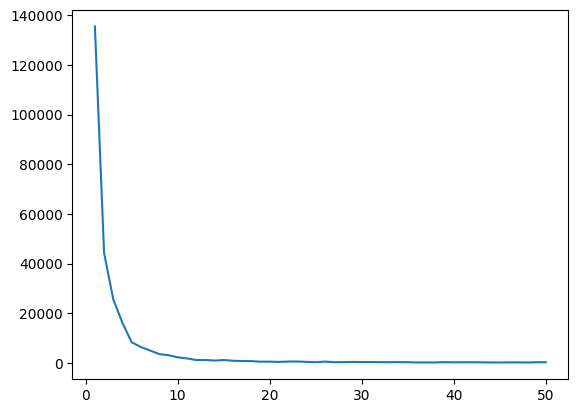

In [4]:
## fullrun
save_dir="./test_result/"+dataset+"/"

scdml=scDMLModel(save_dir=save_dir)
adata=scdml.preprocess(adata_raw,cluster_method="louvain",resolution=1.0)
#print(adata)
scdml.integrate(adata,batch_key="BATCH",ncluster_list=[ncluster],
               expect_num_cluster=ncluster,merge_rule="rule2")

plt.plot(range(1,len(scdml.loss)+1),scdml.loss)

## visulization of integrated embedding

2023-08-30 19:17:59,849 - matplotlib.legend - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


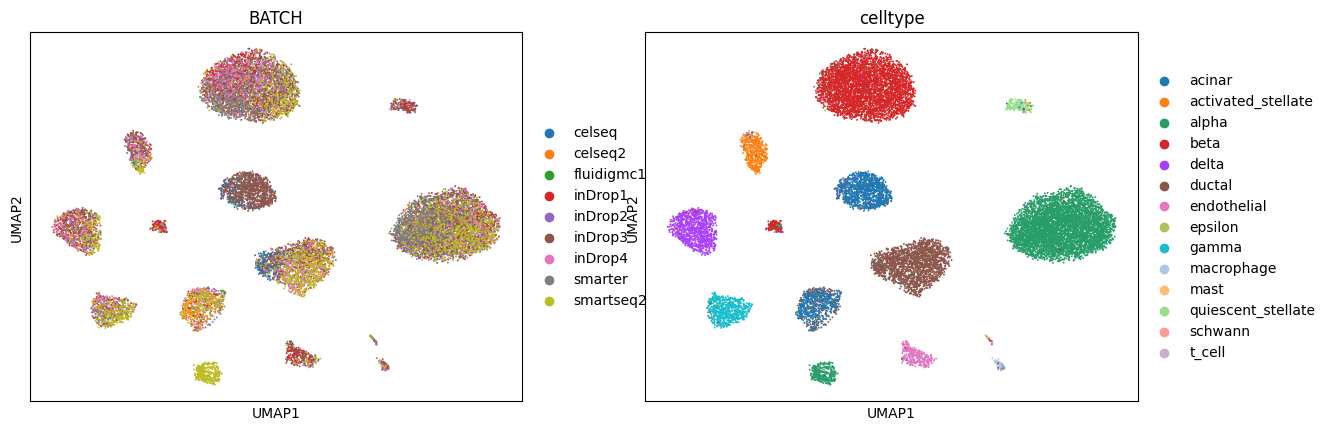

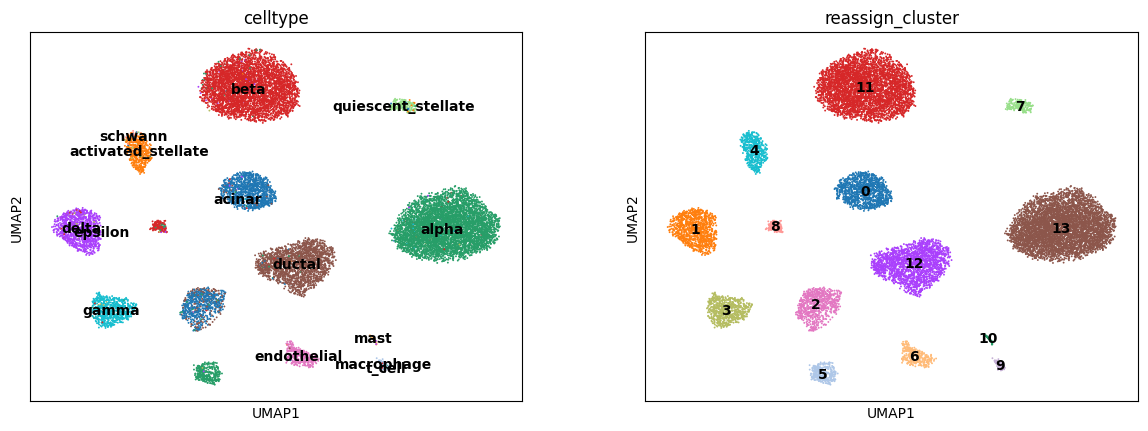

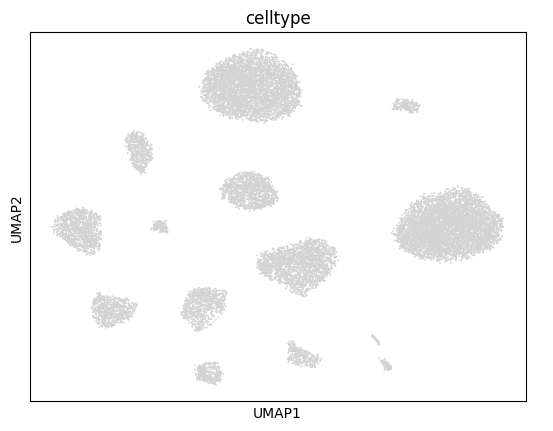

In [5]:
###########################################
sc.pp.neighbors(adata,random_state=0,use_rep="X_emb")
sc.tl.umap(adata)
###########################################

sc.pl.umap(adata,color=["BATCH", "celltype"],show=False)
#plt.savefig(save_dir+"scDML_embedding1.png")
sc.pl.umap(adata,color=["celltype","reassign_cluster"],legend_loc="on data",show=False)
#plt.savefig(save_dir+"scDML_embedding2.png")

sc.pl.umap(adata,color=["celltype"],groups=["OFFx"],na_in_legend=False)

## evaluation

In [6]:
import pandas as pd
df=pd.crosstab(adata.obs["celltype"],adata.obs["reassign_cluster"])
col=df.apply('idxmax', axis=1).values
df=df[col]
df

reassign_cluster,0,4,13,11,1,12,6,1,3,9,10,7,4,9
celltype,,,,,,,,,,,,,,
acinar,1071,5,1,0,0,13,1,0,0,0,0,6,5,0
activated_stellate,0,451,1,2,1,1,1,1,0,0,0,7,451,0
alpha,4,9,5075,29,1,9,1,1,5,3,3,2,9,3
beta,4,0,10,3987,11,4,0,11,4,3,3,0,0,3
delta,3,0,8,30,1004,0,0,1004,0,0,3,1,0,0
ductal,26,0,24,4,0,1918,2,0,0,0,0,0,0,0
endothelial,0,0,0,0,0,0,311,0,0,0,0,1,0,0
epsilon,0,0,11,1,14,0,0,14,4,0,0,0,0,0
gamma,2,0,16,0,0,0,0,0,680,0,0,0,0,0


In [7]:
from sklearn.metrics.cluster import adjusted_rand_score,normalized_mutual_info_score
ari=adjusted_rand_score(adata.obs["reassign_cluster"],adata.obs["celltype"])
nmi=normalized_mutual_info_score(adata.obs["reassign_cluster"],adata.obs["celltype"])
print("ARI={}".format(ari))
print("NMI={}".format(nmi))

ARI=0.8846226749610614
NMI=0.8720090731124633


In [11]:
scib.me.ilisi_graph(adata, batch_key="batch", type_="embed", use_rep="X_umap")

Chunk 1001 does not have enough neighbors. Skipping...
Chunk 3253 does not have enough neighbors. Skipping...
Chunk 3254 does not have enough neighbors. Skipping...
Chunk 3255 does not have enough neighbors. Skipping...
Chunk 3256 does not have enough neighbors. Skipping...
Chunk 3257 does not have enough neighbors. Skipping...
Chunk 3258 does not have enough neighbors. Skipping...
Chunk 3922 does not have enough neighbors. Skipping...
Chunk 3923 does not have enough neighbors. Skipping...
Chunk 4355 does not have enough neighbors. Skipping...
Chunk 4454 does not have enough neighbors. Skipping...
Chunk 5047 does not have enough neighbors. Skipping...
Chunk 5640 does not have enough neighbors. Skipping...
Chunk 5654 does not have enough neighbors. Skipping...
Chunk 5721 does not have enough neighbors. Skipping...
Chunk 5814 does not have enough neighbors. Skipping...
Chunk 5836 does not have enough neighbors. Skipping...
Chunk 6389 does not have enough neighbors. Skipping...
Chunk 6425

0.3955689783791554

In [12]:
scib.me.ilisi_graph(adata, batch_key="batch", type_="embed", use_rep="X_pca")

0.21514208121089073